In [5]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
amaz = pd.read_csv('amazon_cells_labelled.txt', delimiter="\t", header = None)
amaz.columns = ['message','positive']

In [63]:
keywords = ['great', 'fantastic', 'wonderful', 'good', 'friend', 'love', 'excellent', 'perfect', 'happy', 'fine', 'impressed',
           'recommend', 'like', 'awesome', 'incredible']

for key in keywords:
    amaz[str(key)] = amaz.message.str.contains(' '+ str(key) + ' ', case=False)


In [35]:
amaz['positive'] = (amaz['positive'] == 1)


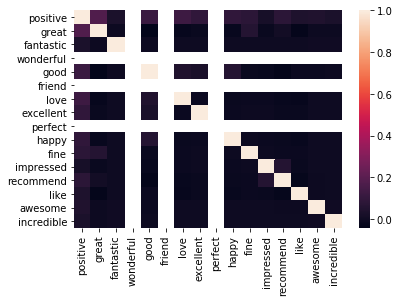

In [36]:
sns.heatmap(amaz.corr())

In [55]:
data = amaz[keywords + ['all_caps']]
target = amaz['positive']


In [56]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

bnb.fit(data, target)

y_pred = bnb.predict(data)


In [57]:
print("Number of mislabeled points out of the total {} points: {}".format(data.shape[0], (target != y_pred).sum()))

Number of mislabeled points out of the total 1000 points: 383


In [58]:
imdb = pd.read_csv('imdb_labelled.txt', delimiter="\t", header = None)
imdb.columns = ['message','positive']


In [59]:
keywords = ['great', 'fantastic', 'wonderful', 'good', 'friend', 'love', 'excellent', 'perfect', 'happy', 'fine', 'impressed',
           'recommend']

for key in keywords:
    imdb[str(key)] = imdb.message.str.contains(' '+ str(key) + ' ', case=False)

In [60]:
imdb['positive'] = (imdb['positive'] == 1)


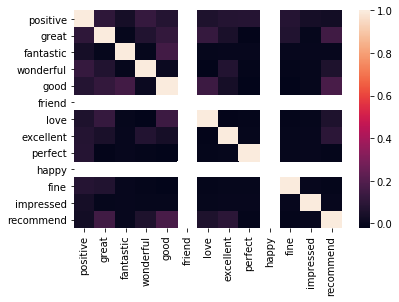

In [61]:
sns.heatmap(imdb.corr())

In [44]:
data_2 = imdb[keywords]
target_2 = imdb['positive']

In [45]:
bnb.fit(data_2, target_2)

y_pred_2 = bnb.predict(data_2)

In [46]:
print("Number of mislabeled points out of the total {} points: {}".format(data_2.shape[0], (target_2 != y_pred_2).sum()))

Number of mislabeled points out of the total 748 points: 318


My model in the first set of data ran and was not very effective. The more words I put into the "keywords" string, the better the performance. I got it below 50% mislabeled and stopped. I looked at a few of the messages to select some of the words that related to a positive message. The model performed about the same on the imdb data.

In [50]:
accuracy = 1 - (383/1000)
accuracy_2 = 1 - (318/748)
print(accuracy, accuracy_2)

0.617 0.5748663101604279


In [51]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(target, y_pred))
print(confusion_matrix(target_2, y_pred_2))

[[468  32]
 [351 149]]
[[342  20]
 [298  88]]


In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = .2, random_state = 20)

print('With 20% holdout Amazon: ' + str(bnb.fit(data, target).score(X_train, y_train)))
print('Testing on sample Amazon: ' + str(bnb.fit(data, target).score(data, target)))

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(data_2, target_2, test_size = .2, random_state = 20)

print('With 20% holdout IMDB: ' + str(bnb.fit(data_2, target_2).score(X_train_2, y_train_2)))
print('Testing on sample IMDB: ' + str(bnb.fit(data_2, target_2).score(data_2, target_2)))

With 20% holdout Amazon: 0.615
Testing on sample Amazon: 0.617
With 20% holdout IMDB: 0.580267558528428
Testing on sample IMDB: 0.5748663101604278


In [53]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(bnb, data, target, cv=10))
print(cross_val_score(bnb, data_2, target_2, cv=10))


[0.63 0.6  0.63 0.6  0.62 0.61 0.65 0.56 0.63 0.57]
[0.5        0.51315789 0.62666667 0.56       0.57333333 0.57333333
 0.64864865 0.62162162 0.59459459 0.52702703]


After running my model on two data sets and then running some evaluation tools on the model. It appears that my model does not "overfit" the data. The only recognizable difference that I can see is if I addd more words to the keywords variable. Then the number of incorrect points goes down, making my model more accurate. I tried to create a feature looking for all caps like in the example but it did not function the way I had hoped. I am not sure what they are referring to when they talk of "writing up different iterations...", other than to change the keywords or create a new feature. I would like somr more information on what type of features can be created for a situation like this one.